In [1]:
import pandas as pd
import numpy as np
import anndata

from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

import networkx as nx

In [2]:
from mapping import get_sorted_gene_order, generate_gene_id_name_map, get_master_regulator_list, get_TF_lists, get_a_matrix_threshold


from constants import OPERATIONS_DIRECTORY

In [3]:
from network_utils import get_all_targets, get_gene_targets, get_gene_targets_multi, get_influencers, calculate_net_effect, construct_network_2d, construct_network, add_network_props, insert_perturbation, activate_perturbation, update_network, export_graph_as_json

from genexpression_utils import fetch_fib_genexpression_data

In [4]:
a_matrix_adata, b_matrix_true = get_a_matrix_threshold(300)

b_matrix = anndata.read_h5ad('/scratch/indikar_root/indikar1/shared_data/HWG/operations/B_matrices_true.h5ad')

master_regulator_list = get_master_regulator_list()
repressorlist, activatorlist, conflictedlist, tf_list = get_TF_lists()

gene_id_name_map, gene_name_id_map = generate_gene_id_name_map()

genes = get_sorted_gene_order()

b_matrix_true = a_matrix_adata[a_matrix_adata.obs_names.isin(tf_list)]

fibroblast_adata = fetch_fib_genexpression_data(a_matrix_adata)

 Total Activators : 174
Total Reprossors : 705
Total Conflicted : 729
Total Transcription Factors : 1608
total master regulators 439
 Total Activators : 174
Total Reprossors : 705
Total Conflicted : 729
Total Transcription Factors : 1608
Extracted 43945 mappings from 73467 ensembl lines
Extracted 38606 mappings from gene id gtf file
Total Mappings Extracted 59979
ordering 18582 genes
Extracted 43945 mappings from 73467 ensembl lines
Extracted 38606 mappings from gene id gtf file
Total Mappings Extracted 59979
    gene_name    cell_type  is_tf   source    category
697   RARRES2  fibroblasts  False  panglao  fibroblast
698     CELA1  fibroblasts  False  panglao  fibroblast
699       LUM  fibroblasts  False  panglao  fibroblast
700     PRRX1  fibroblasts   True  panglao  fibroblast
701    SCARA5  fibroblasts  False  panglao  fibroblast
..        ...          ...    ...      ...         ...
924    COL8A1  fibroblasts  False  panglao  fibroblast
925      PTX3  fibroblasts  False  panglao  f

/home/nuvi/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [124]:
def classify_node(row):
    if row["Gene ID"] in master_regulator_set:
        return "g1"
    elif row["Gene ID"] in tf_set:
        return "g2"
    else:
        return "g3"

def add_name(row):
    return gene_id_name_map.get(row["Gene ID"], "NA")

In [7]:
a_matrix_adata.layers['STRING'].max()

np.int64(999)

In [46]:
def print_network_metrics(G):
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")
    

In [9]:
start, end = 12000, 13000

In [10]:


ntype = 'base'

genes_sub = genes[start:end]

full_network_G = construct_network(a_matrix_adata, genes_sub, [])

full_network_G = add_network_props(full_network_G, ntype)

export_graph_as_json(full_network_G, f'./visualization/graphs/HWG_network{start}_{end}_{ntype}.json')

In [11]:

ntype = 'size'

In [12]:


genes_sub = genes[start:end]

full_network_G = construct_network(a_matrix_adata, genes_sub, [])

full_network_G = add_network_props(full_network_G, ntype)

export_graph_as_json(full_network_G, f'./visualization/graphs/HWG_network{start}_{end}_{ntype}.json')

In [13]:

# perturbation = ['ENSG00000129152']

genes_sub = genes[start:end]

full_network_G = construct_network(a_matrix_adata, fibroblast_expressed_genes, genes_sub)

full_network_G = add_network_props(full_network_G, ntype)


export_graph_as_json(full_network_G, f'./visualization/graphs/fibroblast_network{start}_{end}_{ntype}.json')

In [14]:
perturbation = ['ENSG00000129152']

genes_sub = genes[start:end]

full_network_G = construct_network(a_matrix_adata, fibroblast_expressed_genes, genes_sub)

full_network_G = add_network_props(full_network_G, ntype)

full_network_G = insert_perturbation(full_network_G, perturbation, a_matrix_adata)

# full_network_G = activate_perturbation(full_network_G, perturbation, a_matrix_adata, initial=True)


export_graph_as_json(full_network_G, f'./visualization/graphs/fibroblast_perturbed_network{start}_{end}_{ntype}.json')

Total number of targets1673


In [ ]:
all_targets = get_all_targets(a_matrix_adata, 'ENSG00000129152')


rlist = []
for gene in genes:
    if gene in all_targets and gene in fibroblast_expressed_genes:
        rlist.append(1)
    else:
        rlist.append(0)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(rlist)), rlist)
plt.title("Positions where TF binds to")
plt.show()


In [ ]:
additional_nodes = genes[1000:2500]
perturbation = ['ENSG00000129152']


fib_G = construct_network(a_matrix_adata, fibroblast_expressed_genes, additional_nodes)
fib_G = add_network_props(fib_G)

perturbed_G = activate_perturbation(fib_G, perturbation, a_matrix_adata, initial=True)


print_network_metrics(perturbed_G)
export_graph_as_json(perturbed_G, './visualization/graphs/fibroblast_network.json')

print_network_metrics(perturbed_G)
export_graph_as_json(perturbed_G, './visualization/graphs/fibroblast_perturbed_order_1_network.json')


In [74]:
print_network_metrics(fib_G)

Number of nodes: 2001
Number of edges: 4073
Average degree: 4.07


# 2d Network construction

In [ ]:


ntype = 'base'

genes_sub = genes[start:end]

full_network_G = construct_network(a_matrix_adata, genes_sub, [])

full_network_G = add_network_props(full_network_G, ntype)

export_graph_as_json(full_network_G, f'./visualization/graphs/HWG_network{start}_{end}_{ntype}.json')

In [46]:
a_matrix_adata = get_a_matrix_threshold(150)

In [47]:
print((a_matrix_adata.X == 1).sum())
print((a_matrix_adata.layers['HWG_0'] == 1).sum())

13566588
13757695


In [48]:


ntype = 'base'

genes_sub = genes

full_network_G = construct_network(a_matrix_adata, list(a_matrix_adata.obs_names), [])

# full_network_G = add_network_props(full_network_G, ntype)

degree_centralities = nx.degree_centrality(full_network_G)
eigenvector_centralities = nx.eigenvector_centrality(full_network_G)
# export_graph_as_json(full_network_G, f'./visualization/graphs/HWG_network{start}_{end}_{ntype}.json')

In [49]:
def add_gene_name(row):
    return gene_id_name_map.get(row['gene'], 'NA')

gene_df = pd.DataFrame(genes_sub)
gene_df['gene'] = gene_df[0]
gene_df['gene_name'] = gene_df.apply(add_gene_name, axis=1)
gene_df = gene_df.drop(columns=0)

gene_df

,gene,gene_name
0,ENSG00000000457,SCYL3
1,ENSG00000000460,FIRRM
2,ENSG00000000938,FGR
3,ENSG00000000971,CFH
4,ENSG00000001460,STPG1
...,...,...
18577,ENSG00000284554,NA
18578,ENSG00000285025,MIURF
18579,ENSG00000285304,NA
18580,ENSG00000285404,NA


In [50]:
sorted_eigenvector_centrality = {k: v for k, v in sorted(eigenvector_centralities.items(), key=lambda item: item[1])}
sorted_degree_centrality = {k: v for k, v in sorted(degree_centralities.items(), key=lambda item: item[1])}

eigenvector_df = pd.DataFrame(list(sorted_eigenvector_centrality.items()), columns=['gene', 'EigenvectorCentrality'])
eigenvector_df['EigenVectorRank'] = eigenvector_df['EigenvectorCentrality'].rank(ascending=False, method='min').astype(int)

degree_df = pd.DataFrame(list(sorted_degree_centrality.items()), columns=['gene', 'DegreeCentrality'])
degree_df['DegreeRank'] = degree_df['DegreeCentrality'].rank(ascending=False, method='min').astype(int)



# print(list(sorted_eigenvector_centrality.items())[:100])


In [52]:
all_degree_df = pd.merge(eigenvector_df, degree_df, on='gene', how='outer')
final_degree_df = pd.merge(all_degree_df, gene_df, on='gene', how='outer')
print(final_degree_df)

# final_degree_df.to_csv('data/Centrality_measures/centralities_thr_150.csv')

                  gene  EigenvectorCentrality  EigenVectorRank  \
0      ENSG00000000003               0.002293            12345   
1      ENSG00000000005               0.002907            10808   
2      ENSG00000000419               0.011433             2038   
3      ENSG00000000457               0.001023            16307   
4      ENSG00000000460               0.003017            10531   
...                ...                    ...              ...   
19673  ENSG00000288380               0.002613            11542   
19674  ENSG00000288436               0.000163            19352   
19675  ENSG00000288520               0.000776            17167   
19676  ENSG00000288547               0.000156            19365   
19677  ENSG00000288558               0.001040            16245   

       DegreeCentrality  DegreeRank     gene_name  
0              0.023073       11498           NaN  
1              0.017991       13627           NaN  
2              0.081313        1368          DPM1  

In [53]:
final_degree_df_150 = pd.read_csv('data/Centrality_measures/centralities_thr_150.csv')
final_degree_df_300 = pd.read_csv('data/Centrality_measures/centralities_thr_300.csv')
final_degree_df_600 = pd.read_csv('data/Centrality_measures/centralities_thr_600.csv')

In [55]:
dat_150 = final_degree_df_150[final_degree_df_150['gene_name'] == 'MYOD1']
print(f"MYOD Ranking with Threshold: 150, Degree Centrality: {int(dat_150.DegreeRank)} , Eigenvector Centrality: {int(dat_150.EigenVectorRank)}")


dat_300 = final_degree_df_300[final_degree_df_300['gene_name'] == 'MYOD1']
print(f"MYOD Ranking with Threshold: 300, Degree Centrality: {int(dat_300.DegreeRank)} , Eigenvector Centrality: {int(dat_300.EigenVectorRank)}")


dat_600 = final_degree_df_600[final_degree_df_600['gene_name'] == 'MYOD1']
print(f"MYOD Ranking with Threshold 600, Degree Centrality: {int(dat_600.DegreeRank)} , Eigenvector Centrality: {int(dat_600.EigenVectorRank)}")


MYOD Ranking with Threshold: 150, Degree Centrality: 1226 , Eigenvector Centrality: 1058
MYOD Ranking with Threshold: 300, Degree Centrality: 1015 , Eigenvector Centrality: 970
MYOD Ranking with Threshold 600, Degree Centrality: 1804 , Eigenvector Centrality: 2514


/tmp/ipykernel_316234/2803623206.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"MYOD Ranking with Threshold: 150, Degree Centrality: {int(dat_150.DegreeRank)} , Eigenvector Centrality: {int(dat_150.EigenVectorRank)}")
/tmp/ipykernel_316234/2803623206.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"MYOD Ranking with Threshold: 300, Degree Centrality: {int(dat_300.DegreeRank)} , Eigenvector Centrality: {int(dat_300.EigenVectorRank)}")
/tmp/ipykernel_316234/2803623206.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"MYOD Ranking with Threshold 600, Degree Centrality: {int(dat_600.DegreeRank)} , Eigenvector Centrality: {int(dat_600.EigenVectorRank)}")


In [45]:
final_degree_df[final_degree_df['EigenVectorRank'] == 1]

,gene,EigenvectorCentrality,EigenVectorRank,DegreeCentrality,DegreeRank,gene_name
12679,ENSG00000170889,0.084994,1,0.024191,43,RPS9


In [51]:
centrality_list = list(sortedcentrality.items())[::-1]

for top_gene, top_centrality in centrality_list[:20]:
    print(f'Gene {gene_id_name_map.get(top_gene)} : Centrality {top_centrality}')
    

Gene GAPDH : Centrality 0.48205155804316235
Gene ACTB : Centrality 0.40073193046660566
Gene TP53 : Centrality 0.3827027608847748
Gene AKT1 : Centrality 0.3695710672192024
Gene MYC : Centrality 0.3689252462192562
Gene CTNNB1 : Centrality 0.32247995263979334
Gene EGFR : Centrality 0.3006296754749475
Gene INS : Centrality 0.28808998439265915
Gene ALB : Centrality 0.28173941122652174
Gene JUN : Centrality 0.28163177439319736
Gene TNF : Centrality 0.26801571497766535
Gene HSP90AA1 : Centrality 0.26688552822775957
Gene HSP90AB1 : Centrality 0.26193423389483883
Gene KRAS : Centrality 0.26107313922824393
Gene MAPK3 : Centrality 0.2581131263118239
Gene HSPA4 : Centrality 0.253700016145525
Gene PXDN : Centrality 0.2517087347290243
Gene SRC : Centrality 0.2514396426457134
Gene PTEN : Centrality 0.2486949033959421
Gene NFKB1 : Centrality 0.24729562456272536


In [26]:
# GAPHDH
(a_matrix_adata.X[::, a_matrix_adata.var_names == 'ENSG00000111640'].toarray() == 1).sum()

# MYOD
(a_matrix_adata.X[::, a_matrix_adata.var_names == 'ENSG00000129152'].toarray() == 1).sum()

np.int64(106)

In [16]:


degree_centrality = nx.degree_centrality(fib_G)
eigenvector_centrality = nx.eigenvector_centrality(fib_G)


ordering 18582 genes


In [151]:
def get_influencers(b_matrix, gene_target):
    global repressorlist, activatorlist, conflictedlist, master_regulator_list
    
    # Transcription factors influencing a Gene 
    gene_index = b_matrix.var_names == gene_target
    gene_cols = b_matrix.X[:, gene_index].copy()
    
    if hasattr(gene_cols, "toarray"):
        gene_cols = gene_cols.toarray().ravel()
    else:
        gene_cols = gene_cols.ravel()
    
    matching_obs_mask = gene_cols == 1
    
    gene_influencers = b_matrix.obs_names[matching_obs_mask]

    net_effect = 0
    for gene_influencer in gene_influencers:
        if gene_influencer in activatorlist:
            net_effect += 1
        elif gene_influencer in repressorlist:
            net_effect -= 1
    
    # activations.X
    return gene_influencers, net_effect

current_influencers, net_effect = get_influencers(b_matrix, 'ENSG00000001167')
print(current_influencers, net_effect)

Index(['ENSG00000001167', 'ENSG00000005513', 'ENSG00000005889',
       'ENSG00000006194', 'ENSG00000006468', 'ENSG00000007866',
       'ENSG00000010244', 'ENSG00000020633', 'ENSG00000028277',
       'ENSG00000043039',
       ...
       'ENSG00000230797', 'ENSG00000244405', 'ENSG00000245848',
       'ENSG00000257923', 'ENSG00000260596', 'ENSG00000261678',
       'ENSG00000266265', 'ENSG00000269404', 'ENSG00000272333',
       'ENSG00000276644'],
      dtype='object', name='TFStableID', length=370) -81


In [158]:
additional_nodes = genes
perturbation = ['ENSG00000129152']


fib_G = construct_network(a_matrix_adata, fibroblast_expressed_genes, additional_nodes)


perturblist = 'ENSG00000129152'
# nodelist = list(fib_G.nodes)
# targetset = get_gene_targets(b_matrix, perturblist, fibroblast_expressed_genes)
targetset = b_matrix.var_names


netr = []
totr = []
for target in targetset:
    current_influencers = fib_G.edges(target)

    net_effect = calculate_net_effect(current_influencers)
    netr.append(net_effect)
    
    current_influencers, net_effect = get_influencers(b_matrix, target)
    totr.append(net_effect)

print('fibroblast specific')
print(f'net positive {len([i for i in netr if i > 0])}')
print(f'net negative {len([i for i in netr if i < 0])}')
print(f'net neutral {len([i for i in netr if i == 0])}')

print('all cell types')
print(f'net positive {len([i for i in totr if i > 0])}')
print(f'net negative {len([i for i in totr if i < 0])}')
print(f'net neutral {len([i for i in totr if i == 0])}')

# fibroblast_expressed_genes

# gene_target = 'ENSG00000001167'
# print(get_influencers(b_matrix, gene_target))


fibroblast specific
net positive 0
net negative 0
net neutral 19782
all cell types
net positive 891
net negative 18561
net neutral 330


In [162]:
print(f' Total Activators : {len(activatorlist)}')
print(f'Total Reprossors : {len(repressorlist)}')
print(f'Total Conflicted : {len(conflictedlist)}')

print(f'Total Transcription Factors : {len(tf_list)}')

 Total Activators : 174
Total Reprossors : 705
Total Conflicted : 729
Total Transcription Factors : 1608


In [34]:
# Full network
G = construct_network(a_matrix_adata, list(a_matrix_adata.obs_names))
G = add_network_props(G)

degree_centrality = nx.degree_centrality(G)
# eigenvector_centrality = nx.eigenvector_centrality(G)


ordering 18582 genes


In [138]:
perturb = 'ENSG00000129152'
targetset = get_gene_targets(a_matrix_adata, perturb, a_matrix_adata.obs_names)
print(len(targetset), targetset)


# gene_target = 'ENSG00000001167'
# print(get_influencers(b_matrix, gene_target))


Index(['ENSG00000000005', 'ENSG00000001084', 'ENSG00000001167',
       'ENSG00000002586', 'ENSG00000002745', 'ENSG00000004487',
       'ENSG00000004799', 'ENSG00000004948', 'ENSG00000004975',
       'ENSG00000005007',
       ...
       'ENSG00000274618', 'ENSG00000275063', 'ENSG00000275663',
       'ENSG00000275714', 'ENSG00000276043', 'ENSG00000276644',
       'ENSG00000277586', 'ENSG00000278259', 'ENSG00000285441',
       'ENSG00000285708'],
      dtype='object', length=1673)
1673 Index(['ENSG00000000005', 'ENSG00000001084', 'ENSG00000001167',
       'ENSG00000002586', 'ENSG00000002745', 'ENSG00000004487',
       'ENSG00000004799', 'ENSG00000004948', 'ENSG00000004975',
       'ENSG00000005007',
       ...
       'ENSG00000274618', 'ENSG00000275063', 'ENSG00000275663',
       'ENSG00000275714', 'ENSG00000276043', 'ENSG00000276644',
       'ENSG00000277586', 'ENSG00000278259', 'ENSG00000285441',
       'ENSG00000285708'],
      dtype='object', length=1673)


In [38]:
nodes_of_interest = targetset
filtered_centrality = {node: degree_centrality[node] for node in nodes_of_interest if node in degree_centrality}

sorted_filtered = sorted(filtered_centrality.items(), key=lambda x: x[1], reverse=True)

first_order_interaction_df = pd.DataFrame([(i[0], round(i[1], 3)) for i in sorted_filtered[:100]])

In [45]:
first_order_interaction_df['Gene ID'] = first_order_interaction_df[0]
first_order_interaction_df['Degree Centrality'] = first_order_interaction_df[1]

first_order_interaction_df["Gene Type"] = first_order_interaction_df.apply(classify_node, axis=1)
first_order_interaction_df["Gene Name"] = first_order_interaction_df.apply(add_name, axis=1)

first_order_interaction_df = first_order_interaction_df.drop(columns=[0, 1])
                                         # , 'Fibroblast Gene ID', 'Fibroblast Degree Centrality'])

In [46]:
first_order_interaction_df.to_csv('./data/All_Cells_Top_100_Myod_interactions.csv')

In [66]:
targetset = get_gene_targets(b_matrix, perturblist, a_matrix_adata.obs_names)
print(len(targetset))

for target in targetset[:100]:
    deg

13338


In [54]:
first_order_interaction_df = pd.read_csv('./data/Fibroblast_Top_100_Myod_interactions.csv', index_col=0)

first_order_interaction_df = first_order_interaction_df.drop(columns=['Fibroblast Gene ID', 'Fibroblast Degree Centrality'])


first_order_interaction_df.to_csv('./data/Fibroblast_Top_100_Myod_interactions.csv')

In [26]:
def classify_node(row):
    if row["Gene ID"] in master_regulator_set:
        return "g1"
    elif row["Gene ID"] in tf_set:
        return "g2"
    else:
        return "g3"

def add_centrality(row):
    global degree_centrality
    return round(degree_centrality.get(row['Gene ID']), 3)
def add_eigenvector_centrality(row):    
    global eigenvector_centrality
    
    return round(eigenvector_centrality.get(row['Gene ID']), 3)
    
    
    
def add_name(row):
    return gene_id_name_map.get(row["Gene ID"], "NA")

In [38]:
first_order_interaction_df = pd.DataFrame(targetset)


first_order_interaction_df['Gene ID'] = first_order_interaction_df['GeneStableID']
first_order_interaction_df.drop('GeneStableID', axis=1)

first_order_interaction_df["Gene Type"] = first_order_interaction_df.apply(classify_node, axis=1)
first_order_interaction_df["Gene Name"] = first_order_interaction_df.apply(add_name, axis=1)

first_order_interaction_df["Degree Centrality"] = first_order_interaction_df.apply(add_centrality, axis=1)

first_order_interaction_df["Eigenvector Centrality"] = first_order_interaction_df.apply(add_eigenvector_centrality, axis=1)


In [41]:


first_order_interaction_df_desc = first_order_interaction_df.sort_values(by='Degree Centrality', ascending=False)

In [44]:
first_order_interaction_df_desc.to_csv('./data/myod_first_order_interaction_targets_v3.csv')

In [45]:
first_order_interaction_df_desc

,GeneStableID,Gene ID,Gene Type,Gene Name,Degree Centrality,Eigenvector Centrality
GeneStableIDVersion,,,,,,
ENSG00000111640.15,ENSG00000111640,ENSG00000111640,g3,GAPDH,0.688,0.071
ENSG00000075624.17,ENSG00000075624,ENSG00000075624,g3,ACTB,0.617,0.066
ENSG00000142208.19,ENSG00000142208,ENSG00000142208,g3,AKT1,0.539,0.054
ENSG00000080824.19,ENSG00000080824,ENSG00000080824,g3,HSP90AA1,0.506,0.063
ENSG00000096384.20,ENSG00000096384,ENSG00000096384,g3,HSP90AB1,0.503,0.063
...,...,...,...,...,...,...
ENSG00000123505.20,ENSG00000123505,ENSG00000123505,g3,AMD1,0.001,0.000
ENSG00000112715.26,ENSG00000112715,ENSG00000112715,g3,VEGFA,0.001,0.000
ENSG00000233276.9,ENSG00000233276,ENSG00000233276,g3,GPX1,0.000,0.000


In [47]:
print(len(master_regulator_set))

len(tf_set)

439


1608

In [49]:
gene_row_index = b_matrix[b_matrix.obs['TFStableID'] == 'ENSG00000129152' , :].copy()
gene_row_index

AnnData object with n_obs × n_vars = 1 × 19782
    obs: 'TFStableID', 'TFName', 'TFClass', 'IsTF', 'GeneVersion', 'GeneDescription', 'Entrez_Description', 'GeneType', 'ChromosomescaffoldName', 'GeneStartbp', 'GeneEndbp', 'Strand', 'TranscriptCount', 'DNA_Binding_Domain', 'TF_Assessment', 'Binding', 'Motif_Status', 'ORFeome_Activator', 'DelRosso_Activators', 'DelRosso_Repressors', 'DelRosso_Bifunctional', 'TRRUST_Activators', 'TRRUST_Repressors', 'TRRUST_Conflicting', 'Sums', 'Target_Gene_Count'
    var: 'GeneStableID', 'GeneName', 'ReferenceGenome', 'GeneAliases', 'GeneAliasesWithSources', 'GeneDescription', 'GeneType', 'ChromosomescaffoldName', 'GeneStartbp', 'GeneEndbp', 'Strand', 'TranscriptCount', 'SourceOfGeneName', 'Sourcegene', 'GeneLengthStart2End', 'GeneLengthUnionOfExons', 'ExonCount', 'foundOnBioMartBy'
    layers: '10kp_up_10kb_down', '500bp_up_100bp_down'

In [56]:
matching_obs_mask = gene_row_index.X == 1

print(matching_obs_mask.flatten())
print(len(matching_obs_mask))

[ True  True  True ... False False False]
1


## Visualizing the matrices with Bloom filter



In [22]:

def visualize_bloom(matrix, sigma=1.5, scale=1.0, cmap='hot'):
    """
    Visualizes a binary matrix with smooth 'bloom' around 1s.
    
    Parameters:
    - matrix: binary 2D np.array
    - sigma: how far the bloom spreads (higher = wider glow)
    - scale: multiplier to brighten the image
    - cmap: matplotlib colormap
    """
    # Apply Gaussian blur
    blurred = gaussian_filter(matrix.astype(float), sigma=sigma)
    
    # Optional scaling
    blurred *= scale

    # Plot
    plt.figure(figsize=(8, 6))
    plt.imshow(blurred, cmap=cmap, interpolation='nearest')
    plt.colorbar(label='Interaction Intensity')
    plt.title('Interaction Heatmap (with Bloom)')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

In [24]:
M = a_matrix_adata.X.toarray()

# visualize_bloom(M, sigma=2.5, scale=5.0, cmap='magma')

In [74]:

start = 2000
end = 3000

subm = M[start:end, start:end]

plt.figure(figsize=(10, 10))
plt.imshow(subm, cmap='binary', interpolation='nearest')
plt.axis('off')
plt.savefig(f'figures/interactions/A_matrix_{start}_{end}', bbox_inches='tight', dpi=300)

NameError: name 'M' is not defined

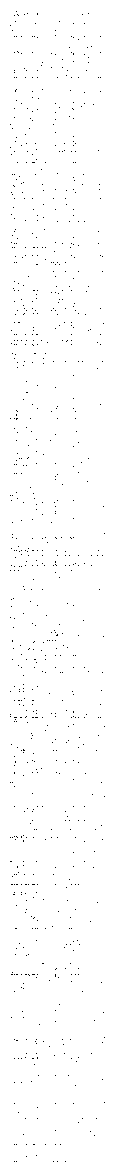

In [6]:
# B = b_matrix.X.T
B = b_matrix_true.X.toarray().T


plt.figure(figsize=(20, 15))
plt.imshow(B, cmap='binary', interpolation='nearest')
plt.axis('off')
plt.savefig(f'figures/interactions/B_matrix_full', bbox_inches='tight', dpi=300)

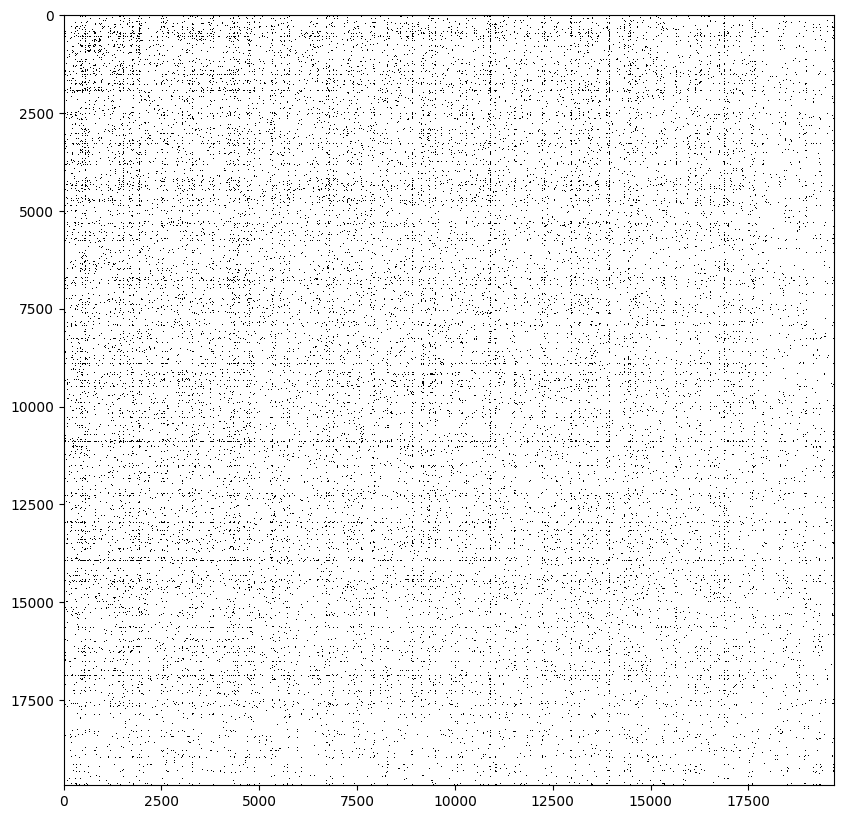

In [41]:

start = 15000
end = 16000

subm = M[start:end, start:end]

plt.figure(figsize=(10, 10))
plt.imshow(M, cmap='binary', interpolation='nearest')
# plt.axis('off')
# plt.savefig(f'figures/interactions/A_matrix_{start}_{end}', bbox_inches='tight', dpi=300)

In [27]:
M.shape

(19678, 19678)

## B matrix operations

In [8]:
b_matrix

AnnData object with n_obs × n_vars = 1608 × 19782
    obs: 'TFStableID', 'TFName', 'TFClass', 'IsTF', 'GeneVersion', 'GeneDescription', 'Entrez_Description', 'GeneType', 'ChromosomescaffoldName', 'GeneStartbp', 'GeneEndbp', 'Strand', 'TranscriptCount', 'DNA_Binding_Domain', 'TF_Assessment', 'Binding', 'Motif_Status', 'ORFeome_Activator', 'DelRosso_Activators', 'DelRosso_Repressors', 'DelRosso_Bifunctional', 'TRRUST_Activators', 'TRRUST_Repressors', 'TRRUST_Conflicting', 'Sums', 'Target_Gene_Count'
    var: 'GeneStableID', 'GeneName', 'ReferenceGenome', 'GeneAliases', 'GeneAliasesWithSources', 'GeneDescription', 'GeneType', 'ChromosomescaffoldName', 'GeneStartbp', 'GeneEndbp', 'Strand', 'TranscriptCount', 'SourceOfGeneName', 'Sourcegene', 'GeneLengthStart2End', 'GeneLengthUnionOfExons', 'ExonCount', 'foundOnBioMartBy'
    layers: '10kp_up_10kb_down', '500bp_up_100bp_down'

In [9]:
gene_target = 'ENSG00000129152'

get_influencers(b_matrix, gene_target)
    

(Index(['ENSG00000005889', 'ENSG00000020633', 'ENSG00000043355',
        'ENSG00000066336', 'ENSG00000073282', 'ENSG00000082175',
        'ENSG00000087510', 'ENSG00000091831', 'ENSG00000100644',
        'ENSG00000100811', 'ENSG00000101412', 'ENSG00000102554',
        'ENSG00000102974', 'ENSG00000104856', 'ENSG00000106459',
        'ENSG00000107249', 'ENSG00000107485', 'ENSG00000107859',
        'ENSG00000109320', 'ENSG00000111049', 'ENSG00000111087',
        'ENSG00000111145', 'ENSG00000111704', 'ENSG00000112592',
        'ENSG00000116604', 'ENSG00000117139', 'ENSG00000118260',
        'ENSG00000120738', 'ENSG00000121068', 'ENSG00000122180',
        'ENSG00000124092', 'ENSG00000124813', 'ENSG00000125798',
        'ENSG00000125952', 'ENSG00000129152', 'ENSG00000129514',
        'ENSG00000130711', 'ENSG00000131931', 'ENSG00000134046',
        'ENSG00000134323', 'ENSG00000136826', 'ENSG00000136997',
        'ENSG00000137203', 'ENSG00000138378', 'ENSG00000139352',
        'ENSG00000140396'

In [69]:
b_matrix.X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(1608, 19678), dtype=int8)

In [21]:

def get_influencer_influenced_lists(b_matrix, gene):
    # b_matrix = b_matrix_true
    
    myod_influencers = b_matrix.X[::, b_matrix.var_names == gene].toarray()
    myod_influenced = b_matrix.X[b_matrix.obs_names == gene, ::].toarray()
    
    myod_influencers_list = list(myod_influencers.ravel().flatten())
    tfs = b_matrix.obs_names
    gene_ids = b_matrix.var_names
    
    myod_influencers_strings = []
    for i in range(len(myod_influencers_list)):
        inf = myod_influencers_list[i]
        if inf == 1:
            myod_influencers_strings.append(gene_id_name_map.get(tfs[i], 'NA'))
    
    myod_influenced_list = list(myod_influenced.flatten())
    myod_influenced_strings = []
    for i in range(len(myod_influenced_list)):
        inf = myod_influenced_list[i]
        if inf == 1:
            myod_influenced_strings.append(gene_id_name_map.get(gene_ids[i], 'NA'))
    return myod_influencers_strings, myod_influenced_strings

prrx1 = 'ENSG00000116132'
myod1 = 'ENSG00000129152'

prrx1_influencers, prrx1_influenced = get_influencer_influenced_lists(b_matrix_true, prrx1)
myod1_influencers, myod1_influenced = get_influencer_influenced_lists(b_matrix_true, myod1)


print(f"PRRX1 influencers : {len(prrx1_influencers)} and PRRX1 influenced : {len(prrx1_influenced)} ")
print(f"MYOD1 influencers : {len(myod1_influencers)} and MYOD1 influenced : {len(myod1_influenced)} ")

PRRX1 influencers : 78 and PRRX1 influenced : 195 
MYOD1 influencers : 169 and MYOD1 influenced : 544 


In [32]:
plotted = plotted.ravel()

labs = [gene_id_name_map.get(i, 'NA') for i in b_matrix.obs_names]

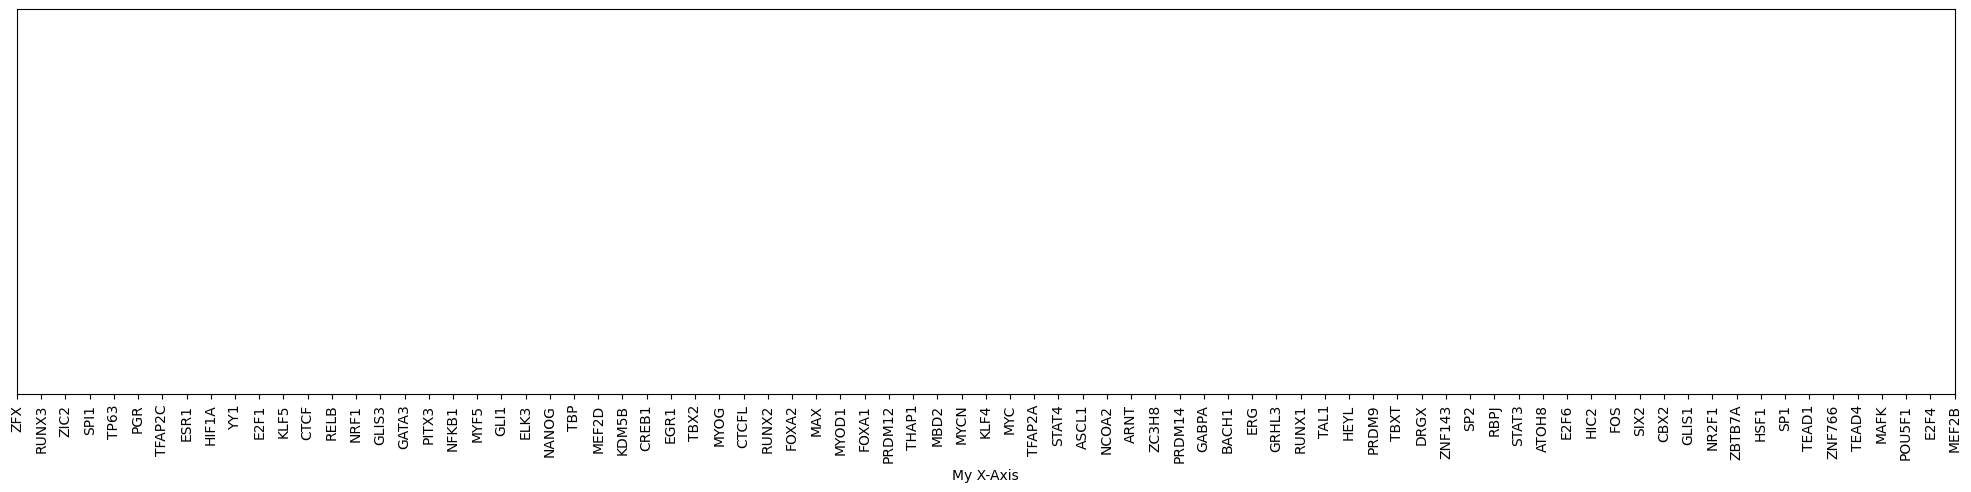

In [65]:
import matplotlib.pyplot as plt

# Create a figure and a single subplot (axes)
fig, ax = plt.subplots(1, 1, figsize=(25, 5))

# Define x-axis tick positions and labels
x_ticks = [i for i in range(len(myod_influencers_strings))]
x_labels = myod_influencers_strings

# Set the x-axis ticks and labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=90)

# Hide the y-axis
ax.yaxis.set_visible(False)

# Optional: Add a title to the x-axis
ax.set_xlabel('My X-Axis')

# Display the plot
plt.savefig('myod_gene_influencers', bbox_inches='tight', dpi=300)


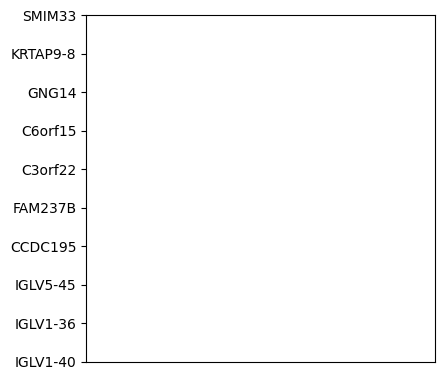

In [75]:
import matplotlib.pyplot as plt

# Create a figure and a single subplot (axes)
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))

yax_lab = myod_influenced_strings[-10:]
# Define x-axis tick positions and labels
y_ticks = [i for i in range(len(yax_lab))]
y_labels = yax_lab

# Set the x-axis ticks and labels
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)

# Hide the y-axis
ax.xaxis.set_visible(False)

# # Optional: Add a title to the x-axis
# ax.set_xlabel('My X-Axis')

# Display the plot
plt.savefig('myod_gene_influenced', bbox_inches='tight', dpi=300)


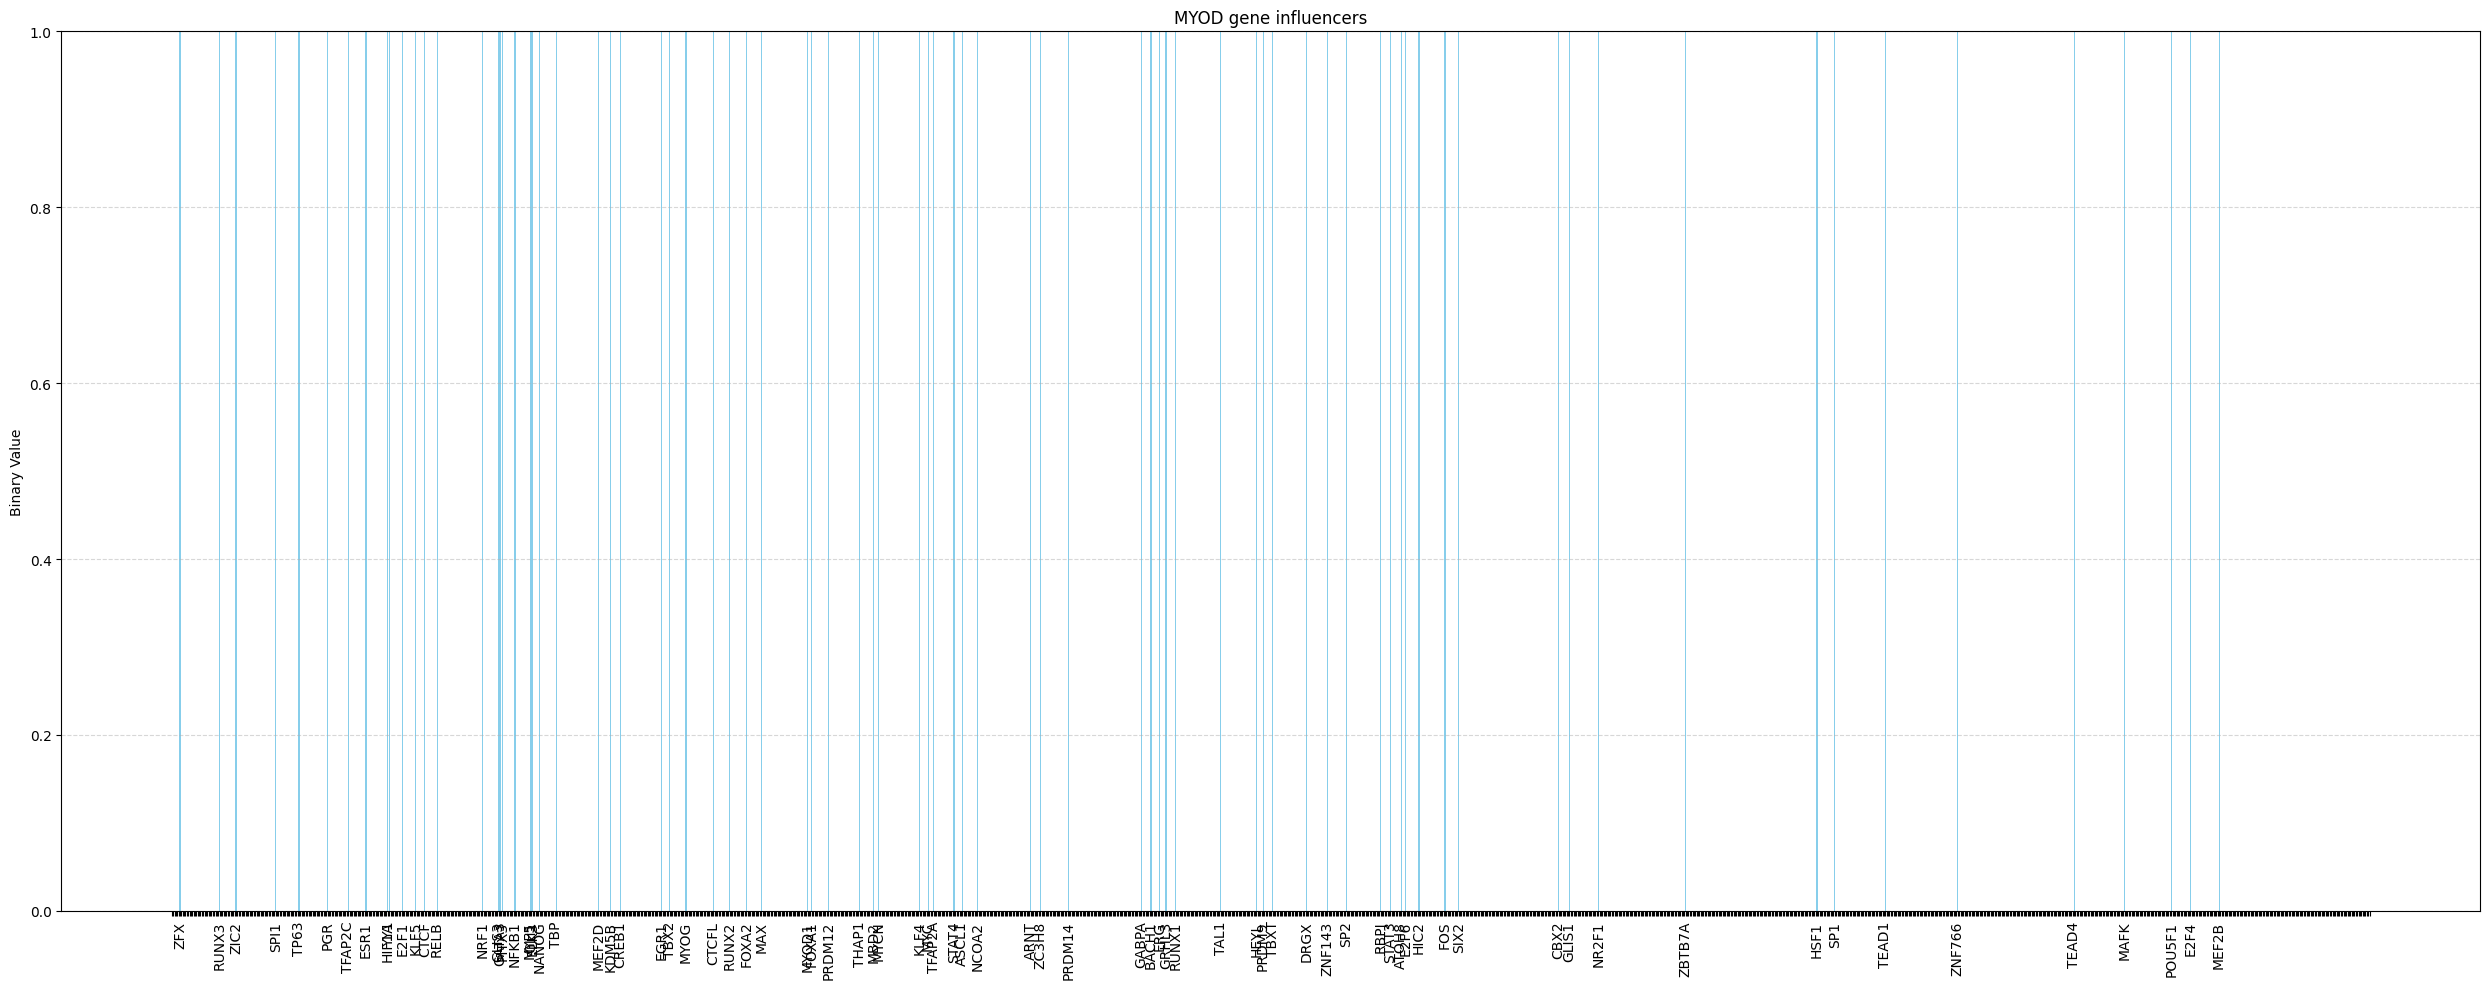

In [40]:
plt.figure(figsize=(25, 10))
plt.bar(range(len(mask)), mask, color=colors)

# Apply custom x-ticks and rotate
plt.xticks(ticks=range(len(mask)), labels=filtered_labels, rotation=90)

plt.ylabel("Binary Value")
plt.ylim(0, 1)
plt.title("MYOD gene influencers")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('myod.png')

In [ ]:
# PRRX1

# gene_name_id_map.get('PRRX1')
# 'ENSG00000116132' in repressorlist

## First Order Interactions

In [24]:
def get_gene_targets(matrix, perturbation, nodelist):

    # Genes infulenced by a transcription factor

    gene_row_index = matrix[matrix.obs_names == perturbation , :].copy()
    
    var_node_mask = matrix.var_names.isin(nodelist)
    
    gene_row = gene_row_index.X
    
    if hasattr(gene_row, "toarray"):
        gene_row = gene_row.toarray().ravel()
    else:
        gene_row = gene_row.ravel()
    
    matching_var_mask = var_node_mask & (gene_row == 1) 
    targets = matrix.var_names[matching_var_mask]
    
    return targets

def fetch_genexpression_data(a_matrix_adata, celltype, cell):
    gene_id_name_map, gene_name_id_map = generate_gene_id_name_map()
    gex_adata = anndata.read_h5ad('./data/Genexpression.h5ad')
    marker_gene_df = pd.read_csv('./data/clean_marker_genes.csv')
    print(gex_adata)
    print(marker_gene_df.cell_type.unique())
    fibroblast_markers = marker_gene_df[marker_gene_df['cell_type'] == celltype]
    marker_genes = list(fibroblast_markers['gene_name'])
    
    
    marker_ids = [ gene_name_id_map[i] for i in marker_genes ]
    expr_values = gex_adata.X[gex_adata.obs_names == cell].flatten()
    
    expr_series = pd.Series(expr_values, index=gex_adata.var_names)
    marker_expr = expr_series[expr_series.index.isin(marker_ids)]
    
    # threshold = marker_expr.mean()
    threshold = marker_expr.median()
    high_expr = expr_series[expr_series > threshold]
    top_genes = high_expr.sort_values(ascending=False)
    top_genes = top_genes[top_genes.index.notna()]
    fibroblast_expressed_genes = top_genes.index.tolist()
    
    fibroblast_adata = a_matrix_adata[a_matrix_adata.obs_names.isin(fibroblast_expressed_genes), a_matrix_adata.var_names.isin(fibroblast_expressed_genes)].copy()
    return fibroblast_adata

print(fetch_genexpression_data(a_matrix_adata, 'fibroblasts', 'Fibroblast'))

Extracted 43945 mappings from 73467 ensembl lines
Extracted 38606 mappings from gene id gtf file
Total Mappings Extracted 59979
AnnData object with n_obs × n_vars = 3 × 22083
    obs: 'name', 'sourcename', 'sourcelink', 'refgenome'
    var: 'GeneName', 'GeneStableIDVersion', 'gene_description', 'gene_location_string', 'gene_location_triple_1', 'gene_location_triple_2', 'gene_location_triple_3', 'gene_strand', 'gene_TSS_location_triple_1', 'gene_TSS_location_triple_2', 'gene_TSS_location_triple_3', 'excludeGene_miRNA'
    uns: 'log1p'
['endothelial_cells' 'endothelial_cells_(aorta)'
 'endothelial_cells_(blood_brain_barrier)'
 'erythroid-like_and_erythroid_precursor_cells' 'fibroblasts'
 'hematopoietic_stem_cells' 'bladder-capillary_endothelial_cell'
 'bladder-endothelial_cell_of_lymphatic_vessel' 'bladder-fibroblast'
 'bladder-vein_endothelial_cell' 'blood-hematopoietic_stem_cell'
 'blood-myeloid_progenitor' 'lung-capillary_endothelial_cell'
 'lung-endothelial_cell_of_artery'
 'lung-end

/home/nuvi/.local/lib/python3.11/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 2424 × 2424
    layers: 'HURI', 'STRING', 'HWG_0', 'HWG_300'

In [21]:
perturbation = 'ENSG00000129152'

full_targetset = get_gene_targets(a_matrix_adata, perturbation, a_matrix_adata.obs_names)
MYOD_target_geneset = set(full_targetset)
fibroblast_geneset = set(fibroblast_adata.obs_names)

print("First Order Interactions")

print(f"HWG Genes : {len(a_matrix_adata.obs_names)}")
print(f"Fibroblast Genes : {len(fibroblast_geneset)}")

first_order_on_genes = MYOD_target_geneset.intersection(fibroblast_geneset)
first_order_off_genes = fibroblast_geneset - MYOD_target_geneset.intersection(fibroblast_geneset)

# First Order
print(f"MYOD first order interactions in HWG : {len(MYOD_target_geneset)}")
print(f"First order ON genes in fibroblast : {len(first_order_on_genes)}")
print(f"First order OFF genes in fibroblast : {len(first_order_off_genes)}")

first_order_fibroblast_geneset = fibroblast_geneset.union(MYOD_target_geneset)

second_order_interactions_HWG = set()
for gene in MYOD_target_geneset:
    sub_targetset = get_gene_targets(a_matrix_adata, gene, a_matrix_adata.obs_names)
    second_order_interactions_HWG = second_order_interactions_HWG.union(sub_targetset)
    

second_order_on_genes = second_order_interactions_HWG.intersection(first_order_fibroblast_geneset)
second_order_off_genes = first_order_fibroblast_geneset - second_order_interactions_HWG.intersection(first_order_fibroblast_geneset)

# Second Order
print(f"MYOD Second order interactions in HWG : {len(second_order_interactions_HWG)}")
print(f"Second order ON genes in fibroblast : {len(second_order_on_genes)}")
print(f"Second order OFF genes in fibroblast : {len(second_order_off_genes)}")



# Active vs Inactive sets
print(f"Intersection of Active genes in Fibroblast and Myotube {}")
print(f"Intersection of Inactive genes in Fibroblast and Myotube {}")

print(f"Intersection of Active genes in first order Fibroblast and Myotube{}")
print(f"Intersection of Active genes in first order Fibroblast and Myotube{}")

print(f"Intersection of Active genes in Second order Fibroblast and Myotube{}")
print(f"Intersection of Active genes in Second order Fibroblast and Myotube{}")





First Order Interactions
HWG Genes : 19678
Fibroblast Genes : 2424
MYOD first order interactions in HWG : 544
First order ON genes in fibroblast : 100
First order OFF genes in fibroblast : 2324
MYOD Second order interactions in HWG : 16034
Second order ON genes in fibroblast : 2745
Second order OFF genes in fibroblast : 123
